# Spectral whitening

This example show the effect of spectral whitening on a stream of traces. The stream is read from the obspy example data, and the whitening is performed with the method `covseisnet.stream NetworkStream.whiten`. The method applies a Fourier transform to the traces, divides the spectrum of the traces by the modulus of the spectrum (or a smooth version of it), and then applies the inverse Fourier transform to the traces.

In [1]:
import covseisnet as csn

## Read waveforms

This section reads an [example stream of seismic data shipped with Obspy](https://docs.obspy.org/packages/autogen/obspy.core.stream.read.html). The stream contains three traces, which are highpass at a very high frequency to see more details in the synchronization.

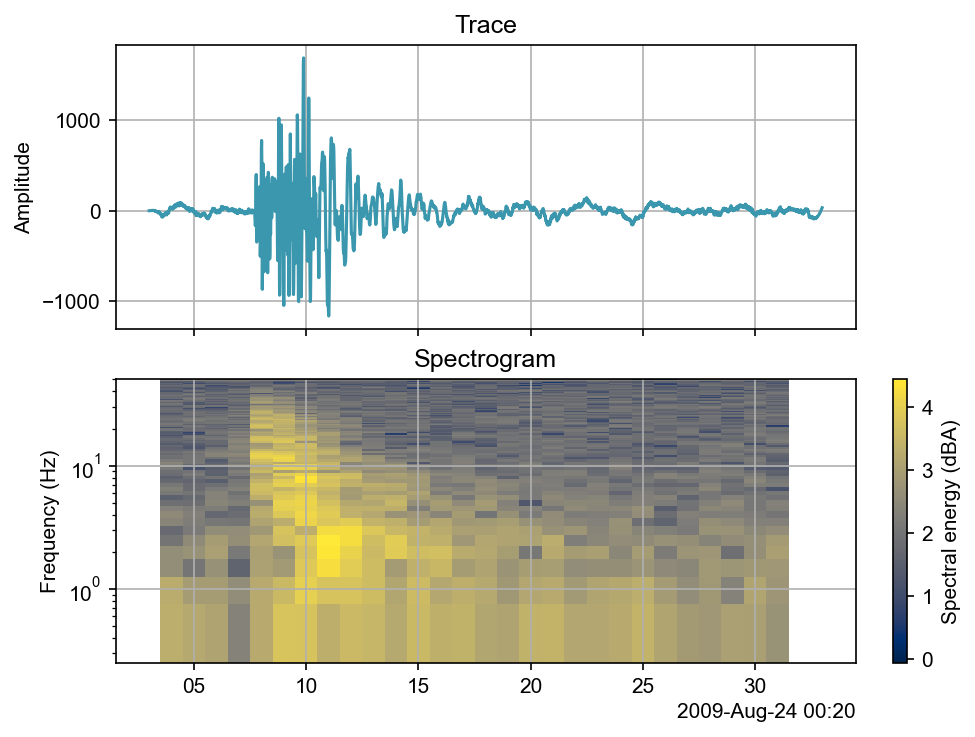

In [2]:
# Read the example stream (shipped with ObsPy)
stream = csn.read()

# Extract the first trace, and preprocess it
trace = stream[0]
trace.filter("highpass", freq=0.4)

# Plot trace and corresponding spectrum
ax = csn.plot.trace_and_spectrogram(
    stream.traces[0], window_duration=2
)

## Spectral whitenin (onebit)

The spectral whitening is applied to the stream using the method `covseisnet.stream.NetworkStream.whiten`. The method applies a Fourier transform to the traces, divides the spectrum of the traces by the modulus of the spectrum, and then applies the inverse Fourier transform to the traces.

Text(0.5, 0.98, 'Whitening of seismic traces')

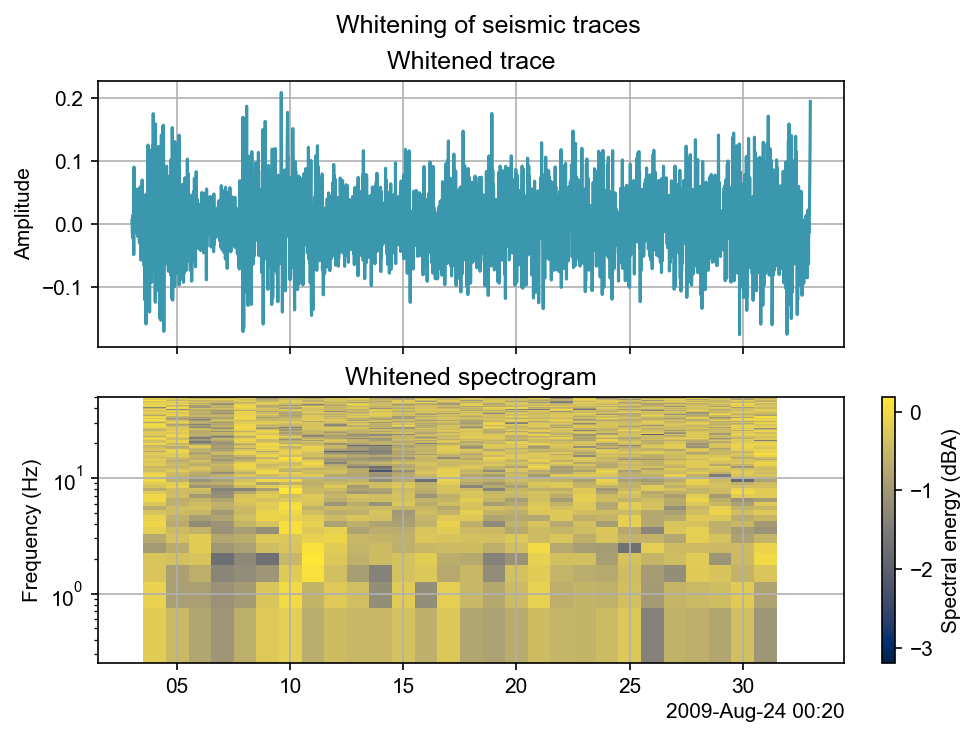

In [3]:
whitened_stream = stream.copy()
whitened_stream.whiten(window_duration=10, smooth_length=0)

# Plot whitened trace and corresponding spectrum
fig, ax = csn.plot.trace_and_spectrogram(
    whitened_stream.traces[0], window_duration=2
)
ax[0].set_title("Whitened trace")
ax[1].set_title("Whitened spectrogram")
fig.suptitle("Whitening of seismic traces")

## Spectral whitening (smooth)

The spectral whitening is applied to the stream using the method `covseisnet.stream.NetworkStream.whiten`. The method applies a Fourier transform to the traces, divides the spectrum of the traces by a smooth version of the modulus of the spectrum, and then applies the inverse Fourier transform. The smoothing is performed with a Savitzky-Golay filter, with a window length of 31 frequency bins.

Text(0.5, 0.98, 'Smooth whitening of seismic traces')

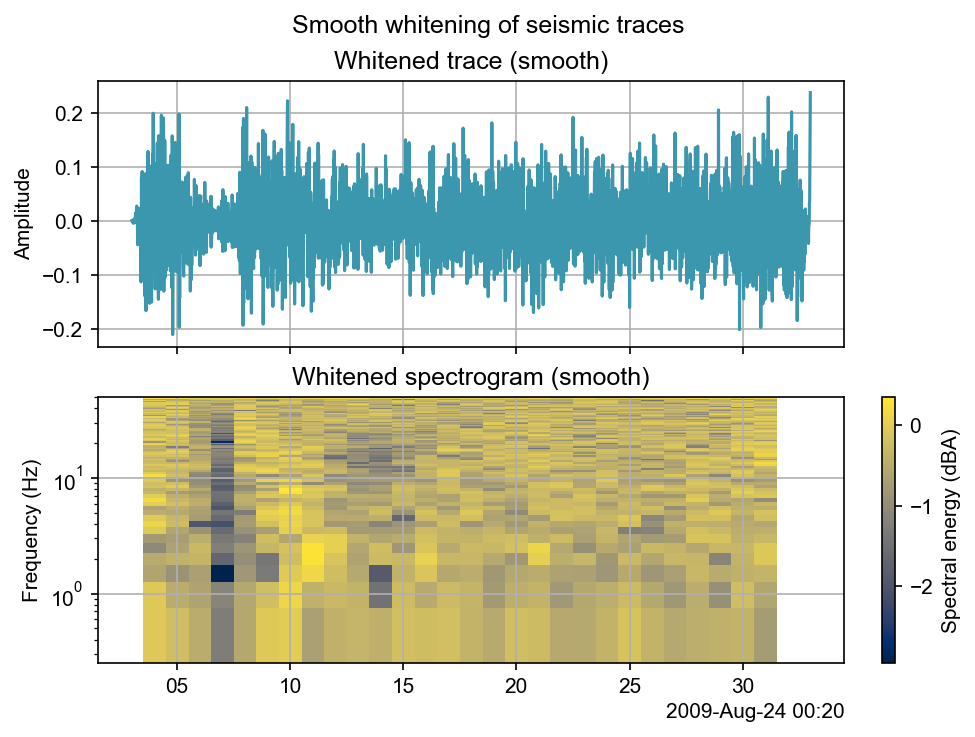

In [4]:
whitened_stream = stream.copy()
whitened_stream.whiten(window_duration=10, smooth_length=31)

# Plot whitened trace and corresponding spectrum
fig, ax = csn.plot.trace_and_spectrogram(
    whitened_stream.traces[0], window_duration=2
)
ax[0].set_title("Whitened trace (smooth)")
ax[1].set_title("Whitened spectrogram (smooth)")
fig.suptitle("Smooth whitening of seismic traces")